In [3]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt
CurrentPath = os.getcwd()
sndata = pd.read_csv(CurrentPath + '/2025/parsonage.txt', sep = ' ', engine='python')


1. Setting priors

\# Omega_radiation calculation

$$\epsilon_{rad,0} = \cfrac{4}{c}\sigma T^4 \approx 2.5\times 10^{-15} \mathrm{J/m^3}$$
$$\epsilon_{crit,0} = \cfrac{3c^2H_0^2}{8\pi G} \approx 7.8\times 10^{-10} \mathrm{J/m^3} $$
We can ignore the energy density of radiation since it's small.

The Age of the universe would be come into account for developing prior.

$$t_{Age} >= 15 \text{Gyr}$$

There will be two models to be considered as a candidate for the Universe.

1. Flat LCDM
2. Curved LCDM

In [1]:
import astropy.units as u

# Unit conversion of the Hubble constant from km/s/Mpc to Gyr^-1
result = (1 * u.km / u.s/u.Mpc)
result2 = result.to(1/u.Gyr)
print(result2)

0.0010227121650456948 1 / Gyr


In [2]:

# Get the Hubble constant from Planck 2018 cosmology (km/s/Mpc)

# Convert 1/H0 to gigayears

def integrand(z, omegam, omegalamb):
    omega0 = omegam + omegalamb
    y = (1+z)**2*(omegam*(1+z)+omegalamb/((1+z)**2)+(1-omega0))**(1/2)
    return 1/y
def AgeofUniverse(H0,omegam, omegalamb):
    I = quad_vec(integrand,0,np.inf, args=(omegam, omegalamb))
    H0_Gyr = H0 * 0.0010227121650456948 # Hubble constant in Gyr^-1
    H0_inverse = 1/H0_Gyr # Hubble constant in Gyr^-1
    T = I[0]*H0_inverse # age is in Gyr, 1/H_0 ~ 14.452 Gyr
    return T

In [ ]:
# Calculate the prior for Flat LCDM
omegam = np.linspace(0.0, 1, 500)
omegalamb = 1.0 - omegam
Hubble0 = np.linspace(0.1,500,1000)
H_Flat, M_Flat = np.meshgrid(Hubble0, omegam)
L_Flat = 1 - M_Flat
prior_flat = np.zeros(M_Flat.shape)
age_flat = AgeofUniverse(H_Flat, M_Flat, L_Flat)
prior_flat[age_flat >= 15] = 1
np.save('prior_flat.npy', prior_flat)

/tmp/ipykernel_32634/1686636946.py:7: RuntimeWarning: overflow encountered in multiply
  y = (1+z)**2*(omegam*(1+z)+omegalamb/((1+z)**2)+(1-omega0))**(1/2)


In [24]:
prior_flat = np.load('prior_flat.npy')
omegam = np.linspace(0.0, 1, 500)
omegalamb = 1.0 - omegam
Hubble0 = np.linspace(0.1,500,1000)
H_Flat, M_Flat = np.meshgrid(Hubble0, omegam)
H_Flat[np.where((M_Flat >=0.1) & (M_Flat <0.11) & (prior_flat == 1))][-1]
M_Flat[np.where((M_Flat >=0.2) & (M_Flat <0.21) & (prior_flat == 1))][-1]

0.20841683366733466

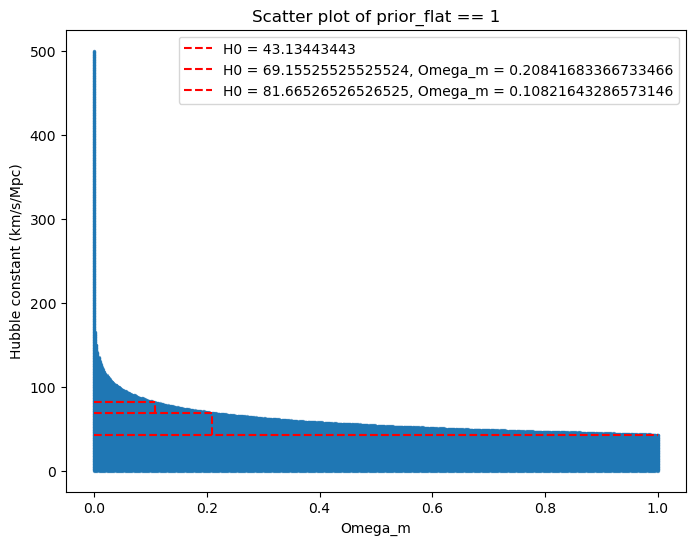

In [30]:

# Hubble0와 omegam은 prior_flat의 축과 일치해야 합니다.
# prior_flat이 1인 위치의 인덱스를 찾음
idx = np.where(prior_flat == 1)

# x축: omegam, y축: Hubble0
plt.figure(figsize=(8, 6))
plt.scatter(M_Flat[idx], H_Flat[idx], s=2, alpha=0.5)
plt.hlines(y=43.13443443,xmin=0.0, xmax = 1, color='red', linestyle='--', linewidth=1.5, label = 'H0 = 43.13443443')
plt.hlines(y=69.15525525525524, xmin = 0.0, xmax = 0.20841683366733466, color='red', linestyle='--', linewidth=1.5, label = 'H0 = 69.15525525525524, Omega_m = 0.20841683366733466')
plt.vlines(x = 0.20841683366733466, ymin = 43.13443443, ymax = 69.15525525525524, color='red', linestyle='--', linewidth=1.5)
plt.hlines(y=81.66526526526525,xmin = 0.0, xmax =0.10821643286573146,  color='red', linestyle='--', linewidth=1.5, label = 'H0 = 81.66526526526525, Omega_m = 0.10821643286573146')
plt.vlines(x = 0.10821643286573146, ymin = 69.15525525525524, ymax = 81.66526526526525, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Omega_m')
plt.ylabel('Hubble constant (km/s/Mpc)')
plt.title('Scatter plot of prior_flat == 1')
plt.legend()
plt.show()

Prior_flat1 : 0< Hubble constant < 43.13443443, 0 < Omega_m < 1

Prior_flat2 : 43.13443443 < Hubble constant < 69.15525525525524, 0 < Omega_m < 0.20841683366733466

Prior_flat3 : 69.15525525525524 < Hubble constant < 81.66526526526525, 0 < Omega_m < 0.10821643286573146

In [ ]:
# Calculate the prior for Curved LCDM
omegam = np.linspace(0.0, 1.0, 100)
omegalamb = np.linspace(0.0, 1.0, 100)
Hubble0 = np.linspace(0.1,500,500)
H, M, L = np.meshgrid(Hubble0, omegam, omegalamb)
prior_curved = np.zeros(M.shape)
age = AgeofUniverse(H,M, L)
prior_curved[age >= 15] = 1
np.save('prior_curved.npy', prior_curved)

/tmp/ipykernel_32634/1686636946.py:7: RuntimeWarning: overflow encountered in multiply
  y = (1+z)**2*(omegam*(1+z)+omegalamb/((1+z)**2)+(1-omega0))**(1/2)


In [4]:
omegam = np.linspace(0.0, 1.0, 100)
omegalamb = np.linspace(0.0, 1.0, 100)
Hubble0 = np.linspace(0.1,500,500)
H, M, L = np.meshgrid(Hubble0, omegam, omegalamb)
prior_curved = np.load('prior_curved.npy')

Text(0.5, 0, 'Hubble constant (km/s/Mpc)')

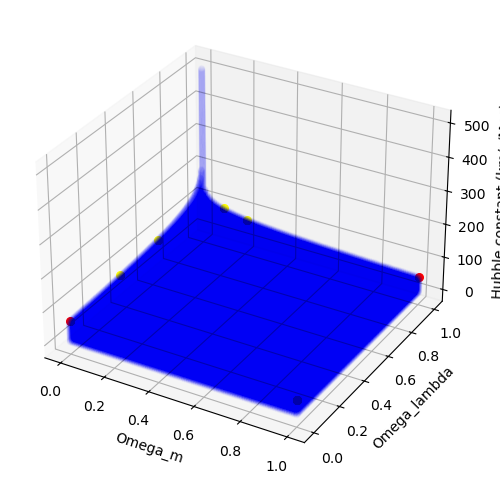

In [ ]:
idx = np.where(prior_curved == 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
cond1 = np.where((M == 1) & (L == 0) & (prior_curved == 1))
if cond1[0].size > 0:
    ax.scatter(M[cond1][-1], L[cond1][-1], H[cond1][-1], color='red', s=30) # Omegam = 1, Omegalamb=0, H = 43.17755511022044

cond2 = np.where((M == 0) & (L == 0) & (prior_curved == 1))
if cond2[0].size > 0:
    ax.scatter(M[cond2][-1], L[cond2][-1], H[cond2][-1], color='red', s=30)  # Omegam = 0, Omegalamb=0, H =64.21543086172343
cond3 = np.where((M == 1) & (L == 1) & (prior_curved == 1))  # Omegam = 0, Omegalamb=0, H =50.190180360721435
if cond3[0].size > 0:
    ax.scatter(M[cond3][-1], L[cond3][-1], H[cond3][-1], color='red', s=30)
    
cond4 = np.where((M >= 0.2) & (M < 0.22) &(L == 1)& (prior_curved == 1))  # Omegam = 0, Omegalamb=0, H =50.190180360721435
if cond4[0].size > 0:
    ax.scatter(M[cond4][-1], L[cond4][-1], H[cond4][-1], color='yellow', s=30) 
cond5 = np.where((H >= 75.23) & (H < 75.33) &(M == 0)& (prior_curved == 1))  # Omegam = 0, Omegalamb=0, H =50.190180360721435
if cond5[0].size > 0:
    ax.scatter(M[cond5][0], L[cond5][0], H[cond5][0], color='yellow', s=30)

cond6 = np.where((M >= 0.1) & (M < 0.11) &(L == 1)& (prior_curved == 1))
if cond6[0].size > 0:
    ax.scatter(M[cond6][-1], L[cond6][-1], H[cond6][-1], color='yellow', s=30)
cond7 = np.where((H > 89.26052104) & (M == 0) & (prior_curved == 1))
if cond7[0].size > 0:
    ax.scatter(M[cond7][0], L[cond7][0], H[cond7][0], color='yellow', s=30)

ax.scatter(M[idx], L[idx], H[idx], c='b', marker='o', alpha=0.01, zorder = 1)
for artist in red_points:
    artist.set_zorder(10)
for artist in yellow_points:
    artist.set_zorder(20)
blue.set_zorder(1)
ax.set_xlabel('Omega_m')
ax.set_ylabel('Omega_lambda')
ax.set_zlabel('Hubble constant (km/s/Mpc)')

In [39]:
L[np.where((H > 89.26052104) & (M == 0) & (prior_curved == 1))]

array([0.64646465, 0.65656566, 0.66666667, ..., 1.        , 1.        ,
       1.        ])

Prior_1 = 0 < Hubble0 < 43.17755511022044
Prior_2 = 43.17755511022044 < Hubble0 < 75.23527054108214, 0 < Omega_m < 0.21212121212121213, 0.36363636363636365 < Omegalamb < 1.0
Prior_3 = 75.23527054108214 < Hubble0 < 89.26052104208415, 0 < Omega_m < 0.10101010101010102, 0.6464646464646465 < Omegalamb < 1.0


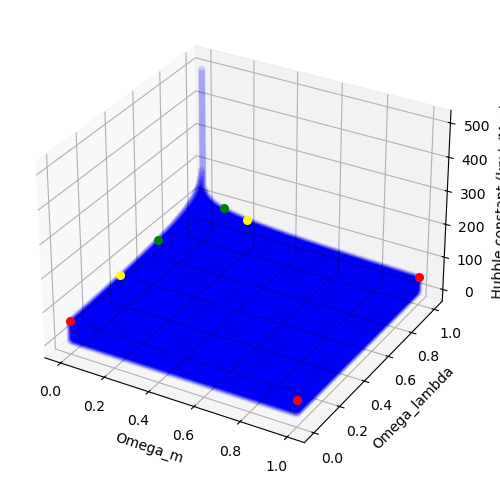

In [47]:
# ...existing code...
idx = np.where(prior_curved == 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# 파란 점(전체 prior)을 먼저 plot (맨 뒤로)
blue = ax.scatter(M[idx], L[idx], H[idx], c='b', marker='o', alpha=0.01, zorder=1)

# 조건별로 노란/빨간 점을 나중에 plot (맨 앞으로)
red_points = []
yellow_points = []

cond1 = np.where((M == 1) & (L == 0) & (prior_curved == 1))
if cond1[0].size > 0:
    red_points.append(ax.scatter(M[cond1][-1], L[cond1][-1], H[cond1][-1], color='red', s=30, zorder=10))

cond2 = np.where((M == 0) & (L == 0) & (prior_curved == 1))
if cond2[0].size > 0:
    red_points.append(ax.scatter(M[cond2][-1], L[cond2][-1], H[cond2][-1], color='red', s=30, zorder=10))
cond3 = np.where((M == 1) & (L == 1) & (prior_curved == 1))
if cond3[0].size > 0:
    red_points.append(ax.scatter(M[cond3][-1], L[cond3][-1], H[cond3][-1], color='red', s=30, zorder=10))
    
cond4 = np.where((M >= 0.2) & (M < 0.22) &(L == 1)& (prior_curved == 1))
if cond4[0].size > 0:
    yellow_points.append(ax.scatter(M[cond4][-1], L[cond4][-1], H[cond4][-1], color='yellow', s=30, zorder=20)) 
cond5 = np.where((H >= 75.23) & (H < 75.33) &(M == 0)& (prior_curved == 1))
if cond5[0].size > 0:
    yellow_points.append(ax.scatter(M[cond5][0], L[cond5][0], H[cond5][0], color='yellow', s=30, zorder=20))
    
cond6 = np.where((M >= 0.1) & (M < 0.11) &(L == 1)& (prior_curved == 1))
if cond6[0].size > 0:
    yellow_points.append(ax.scatter(M[cond6][-1], L[cond6][-1], H[cond6][-1], color='green', s=30, zorder=20))
cond7 = np.where((H > 89.26052104) & (M == 0) & (prior_curved == 1))
if cond7[0].size > 0:
    yellow_points.append(ax.scatter(M[cond7][0], L[cond7][0], H[cond7][0], color='green', s=30, zorder=20))

# zorder를 강제로 재할당 (matplotlib은 3D에서 zorder가 완벽히 동작하지 않을 수 있으나, 이 방식이 최선)
for artist in red_points:
    artist.set_zorder(10)
for artist in yellow_points:
    artist.set_zorder(20)
blue.set_zorder(1)

ax.set_xlabel('Omega_m')
ax.set_ylabel('Omega_lambda')
ax.set_zlabel('Hubble constant (km/s/Mpc)')
print(f'Prior_1 = 0 < Hubble0 < {H[cond1][-1]}')
print(f'Prior_2 = {H[cond1][-1]} < Hubble0 < {H[cond4][-1]}, 0 < Omega_m < {M[cond4][-1]}, {L[cond5][0]} < Omegalamb < {L[cond4][-1]}')
print(f'Prior_3 = {H[cond4][-1]} < Hubble0 < {H[cond6][-1]}, 0 < Omega_m < {M[cond6][-1]}, {L[cond7][0]} < Omegalamb < {L[cond6][-1]}')
plt.show()
# ...existing code...

1. Supernovae data:

$$M_B ≈ M_V ≈ −19.30 ± 0.03 + 5 \log(H_0/60) \qquad \text{Hillebrandt, W.; Niemeyer, J. C. (2000)}$$

$$\text{we will calculate} \ \log(d_L) \text{ with distance modulus } m - M = 5\log (d_L/10)$$
-> fit the log(d_L) with cosmological parameters


In [41]:

# observed data
mb = sndata['mb'].values
dmb = sndata['dmb'].values
z = sndata['zcmb'].values
H0 = 67.7 # km/s/Mpc Planck 2018
# distance modulus
absmb = -19.3 + 5*np.log10(H0/60) # H0 = 67.7 km/s/Mpc
dabsmb = 0.03

logdl_obs = (mb - absmb + 5)/5 
dlogdl_obs = (dmb + dabsmb)/5

In [50]:
def dL_SN_Obs(mb, dmb, H0): # calculate luminosity distance from observed data with the distance modulus
    absmb = -19.3 + 5*np.log10(H0/60) # H0 in km/s/Mpc
    dabsmb = 0.03
    
    logdl_obs = (mb - absmb + 5)/5 
    dlogdl_obs = (dmb + dabsmb)/5
    return logdl_obs, dlogdl_obs

In [ ]:
# calculated data via the model

# model parameters
# 1. Flat Lambda CDM
def integrand_flat_LCDM(z, Omega_m):
    Omega_L = 1 - Omega_m
    E = (1+z)**2*np.sqrt(Omega_m*(1+z) + Omega_L/(1+z)**2)
    return 1/E

def Flat_LCDM(z, H0,Omega_m):
    """_summary_

    Args:
        z (redshift): The redshift parameter.
        H0 (float): The Hubble constant in km/s/Mpc.
        Omega_m (float): The matter density parameter.

    Returns:
        float: The log Luminosity distance at redshift z in Mpc.
    """
    c = 299792.458
    dp = c*1/H0* quad_vec(integrand_flat_LCDM, 0, z, args=(H0, Omega_m))
    dl = (1+z)*dp[0]
    logdl = np.log10(dl)
    return logdl

# 2. Curvature Lambda CDM


# 3. 

In [ ]:
from tqdm import tqdm

# 1. make a code that acoounts for a prior
def ln_prior(min,max):
    volume = np.sum(np.abs(min - max)) # volume of the prior
    return np.log(1/volume)
        
def Loglikelihood(func, parm, x0,y0,var): # return Loglikelihood = -chisq
    diff = (y0 - func(x0, parm))**2
    chisq = np.sum(diff/var)
    return -chisq

def ln_f(func, param, x0, y0, var, prior, lnprior): # return total Loglikelihood
    bool = np.all((prior[0] <= param) & (param <= prior[1]))
    if bool == True:
        return lnprior + Loglikelihood(func, param, x0,y0,var)
    else:
        return -np.inf

def Markov(func, paramk,paramkp1,x,y,var, prior, lnprior):
    minuschisqk = ln_f(func, paramk, x,y,var, prior, lnprior)
    minuschisqkp1 = ln_f(func, paramkp1, x,y,var, prior, lnprior)
    lnr = np.log(np.random.uniform(0.,1.))

    if minuschisqkp1 - minuschisqk > lnr:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : True")
        return paramkp1, minuschisqkp1
    else:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : False")
        return paramk, minuschisqk  
def MCMC(func, paraminit, nstep,normal_vec,x,y,var, prior):
    lnprior = ln_prior(prior[0], prior[1]) # calculate the prior volume likelihood
    param0 = paraminit
    arr = np.zeros((len(param0) + 1,nstep))
    stepsize = normal_vec
    for k in tqdm(range(nstep)):
        paramkp1 = np.array(param0 + np.random.normal(0,stepsize))
        param0, loglikelihood = Markov(func, param0, paramkp1,x,y,var, prior, lnprior) #loglikelihood = -chisq
        col = np.hstack((param0, loglikelihood))
        arr[:,k] = col
    return arr